In [1]:
# Loading the required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

### Load Data

In [2]:
fifa=pd.read_csv('players_20.csv')
fifa.head()

,sofifa_id,player_url,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club,...,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
0,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,32,1987-06-24,170,72,Argentina,FC Barcelona,...,68+2,66+2,66+2,66+2,68+2,63+2,52+2,52+2,52+2,63+2
1,20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,34,1985-02-05,187,83,Portugal,Juventus,...,65+3,61+3,61+3,61+3,65+3,61+3,53+3,53+3,53+3,61+3
2,190871,https://sofifa.com/player/190871/neymar-da-sil...,Neymar Jr,Neymar da Silva Santos Junior,27,1992-02-05,175,68,Brazil,Paris Saint-Germain,...,66+3,61+3,61+3,61+3,66+3,61+3,46+3,46+3,46+3,61+3
3,200389,https://sofifa.com/player/200389/jan-oblak/20/...,J. Oblak,Jan Oblak,26,1993-01-07,188,87,Slovenia,Atlético Madrid,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,183277,https://sofifa.com/player/183277/eden-hazard/2...,E. Hazard,Eden Hazard,28,1991-01-07,175,74,Belgium,Real Madrid,...,66+3,63+3,63+3,63+3,66+3,61+3,49+3,49+3,49+3,61+3


### Data exploration

In [3]:
fifa.shape

(18278, 104)

From the shape of the data, we observe that there are:

18,278 observations
104 features


Now let us print the column names and find out what the 104 features are.

In [4]:
list(fifa.columns)

['sofifa_id',
 'player_url',
 'short_name',
 'long_name',
 'age',
 'dob',
 'height_cm',
 'weight_kg',
 'nationality',
 'club',
 'overall',
 'potential',
 'value_eur',
 'wage_eur',
 'player_positions',
 'preferred_foot',
 'international_reputation',
 'weak_foot',
 'skill_moves',
 'work_rate',
 'body_type',
 'real_face',
 'release_clause_eur',
 'player_tags',
 'team_position',
 'team_jersey_number',
 'loaned_from',
 'joined',
 'contract_valid_until',
 'nation_position',
 'nation_jersey_number',
 'pace',
 'shooting',
 'passing',
 'dribbling',
 'defending',
 'physic',
 'gk_diving',
 'gk_handling',
 'gk_kicking',
 'gk_reflexes',
 'gk_speed',
 'gk_positioning',
 'player_traits',
 'attacking_crossing',
 'attacking_finishing',
 'attacking_heading_accuracy',
 'attacking_short_passing',
 'attacking_volleys',
 'skill_dribbling',
 'skill_curve',
 'skill_fk_accuracy',
 'skill_long_passing',
 'skill_ball_control',
 'movement_acceleration',
 'movement_sprint_speed',
 'movement_agility',
 'movement_re

In [5]:
fifa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18278 entries, 0 to 18277
Columns: 104 entries, sofifa_id to rb
dtypes: float64(16), int64(45), object(43)
memory usage: 14.5+ MB


From the above line we infer the data types of our features.

   data types: float64(16), int64(45), object(43)

We must note that we need to deal with object data types as numeric data is preferred for training models well.


Now let us analyse the statistical description of our data.

In [6]:
fifa.describe()

,sofifa_id,age,height_cm,weight_kg,overall,potential,value_eur,wage_eur,international_reputation,weak_foot,...,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes
count,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,1.827800e+04,18278.000000,18278.000000,18278.000000,...,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000
mean,219738.864482,25.283291,181.362184,75.276343,66.244994,71.546887,2.484038e+06,9456.942773,1.103184,2.944250,...,48.383357,58.528778,46.848889,47.640333,45.606631,16.572765,16.354853,16.212934,16.368038,16.709924
std,27960.200461,4.656964,6.756961,7.047744,6.949953,6.139669,5.585481e+06,21351.714095,0.378861,0.664656,...,15.708099,11.880840,20.091287,21.585641,21.217734,17.738069,16.996925,16.613665,17.136497,18.038125
min,768.000000,16.000000,156.000000,50.000000,48.000000,49.000000,0.000000e+00,0.000000,1.000000,1.000000,...,7.000000,12.000000,1.000000,5.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,204445.500000,22.000000,177.000000,70.000000,62.000000,67.000000,3.250000e+05,1000.000000,1.000000,3.000000,...,39.000000,51.000000,29.000000,27.000000,24.000000,8.000000,8.000000,8.000000,8.000000,8.000000
50%,226165.000000,25.000000,181.000000,75.000000,66.000000,71.000000,7.000000e+05,3000.000000,1.000000,3.000000,...,49.000000,60.000000,52.000000,55.000000,52.000000,11.000000,11.000000,11.000000,11.000000,11.000000
75%,240795.750000,29.000000,186.000000,80.000000,71.000000,75.000000,2.100000e+06,8000.000000,1.000000,3.000000,...,60.000000,67.000000,64.000000,66.000000,64.000000,14.000000,14.000000,14.000000,14.000000,14.000000
max,252905.000000,42.000000,205.000000,110.000000,94.000000,95.000000,1.055000e+08,565000.000000,5.000000,5.000000,...,92.000000,96.000000,94.000000,92.000000,90.000000,90.000000,92.000000,93.000000,91.000000,92.000000


We can make the following observations:

outliers in columns like age, value_eur, wage_eur, international_reputation, etc
All features have different value scales.

### Data Cleaning

In [7]:
#removing redundant columns
redundant_columns = ['sofifa_id','player_url','long_name','dob','nation_jersey_number','loaned_from']
fifa = fifa.drop(redundant_columns, axis = 1)

Let us look at the revised data now after removing redundant features:

In [8]:
# show all data shape ( means how many rows and columns)
fifa.shape

(18278, 98)

In [9]:
#  show all columns names using for loop
for col in fifa.columns:
    print(col)

short_name
age
height_cm
weight_kg
nationality
club
overall
potential
value_eur
wage_eur
player_positions
preferred_foot
international_reputation
weak_foot
skill_moves
work_rate
body_type
real_face
release_clause_eur
player_tags
team_position
team_jersey_number
joined
contract_valid_until
nation_position
pace
shooting
passing
dribbling
defending
physic
gk_diving
gk_handling
gk_kicking
gk_reflexes
gk_speed
gk_positioning
player_traits
attacking_crossing
attacking_finishing
attacking_heading_accuracy
attacking_short_passing
attacking_volleys
skill_dribbling
skill_curve
skill_fk_accuracy
skill_long_passing
skill_ball_control
movement_acceleration
movement_sprint_speed
movement_agility
movement_reactions
movement_balance
power_shot_power
power_jumping
power_stamina
power_strength
power_long_shots
mentality_aggression
mentality_interceptions
mentality_positioning
mentality_vision
mentality_penalties
mentality_composure
defending_marking
defending_standing_tackle
defending_sliding_tackle
goa

In [10]:
# which nationality have the highest number of players in this dataframe ?
fifa['nationality'].value_counts()

England                1667
Germany                1216
Spain                  1035
France                  984
Argentina               886
                       ... 
Liberia                   1
São Tomé & Príncipe       1
Puerto Rico               1
Bahrain                   1
Indonesia                 1
Name: nationality, Length: 162, dtype: int64

In [11]:
# Top 10 nationality have the most players in this dataframe ?
fifa['nationality'].value_counts()[:10]

England        1667
Germany        1216
Spain          1035
France          984
Argentina       886
Brazil          824
Italy           732
Colombia        591
Japan           453
Netherlands     416
Name: nationality, dtype: int64

In [12]:
fifa['nationality'].value_counts()[:5].keys()

Index(['England', 'Germany', 'Spain', 'France', 'Argentina'], dtype='object')

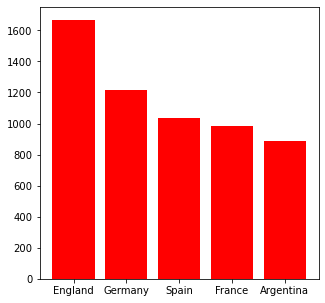

In [13]:
# Bar plot on top 5 nationality
plt.figure(figsize=(5,5))
plt.bar(list(fifa['nationality'].value_counts()[:5].keys()),list(fifa['nationality'].value_counts()[:5]),color="r")
plt.show()


In [14]:
#extracting 2 column and find player salary
player_salary = fifa[["short_name","wage_eur"]]
player_salary .head()

,short_name,wage_eur
0,L. Messi,565000
1,Cristiano Ronaldo,405000
2,Neymar Jr,290000
3,J. Oblak,125000
4,E. Hazard,470000


In [15]:
#  Top 5 players getting highest salary.
player_salary =player_salary .sort_values(by=['wage_eur'],ascending=False)
player_salary .head()

,short_name,wage_eur
0,L. Messi,565000
4,E. Hazard,470000
1,Cristiano Ronaldo,405000
5,K. De Bruyne,370000
22,A. Griezmann,370000


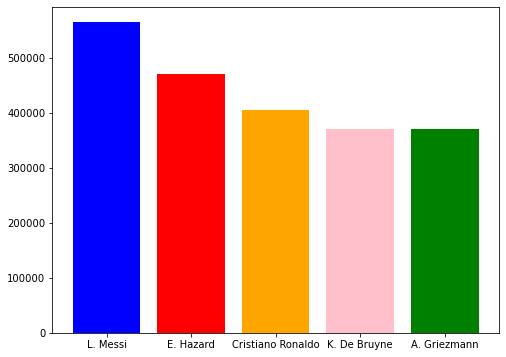

In [16]:
# Top 5 players getting highest salary
plt.figure(figsize=(8,6))
plt.bar(list(player_salary['short_name'])[0:5],list(player_salary['wage_eur'])[0:5],color=["blue","red","orange","pink","green"])
plt.show()

### Individual nationality information

1. Germany

In [17]:
fifa['nationality']=="Germany"

0        False
1        False
2        False
3        False
4        False
         ...  
18273    False
18274    False
18275    False
18276    False
18277    False
Name: nationality, Length: 18278, dtype: bool

In [19]:
#  10 only Germany nationality players
Germany=fifa[fifa['nationality']=='Germany']
Germany.head(10)

,short_name,age,height_cm,weight_kg,nationality,club,overall,potential,value_eur,wage_eur,...,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
6,M. ter Stegen,27,187,85,Germany,FC Barcelona,90,93,67500000,250000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
31,M. Neuer,33,193,92,Germany,FC Bayern München,88,88,32000000,155000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
36,T. Kroos,29,183,76,Germany,Real Madrid,88,88,57000000,330000,...,75+3,79+3,79+3,79+3,75+3,72+3,69+3,69+3,69+3,72+3
37,M. Reus,30,180,71,Germany,Borussia Dortmund,88,88,56000000,170000,...,69+3,65+3,65+3,65+3,69+3,64+3,55+3,55+3,55+3,64+3
49,M. Hummels,30,191,94,Germany,Borussia Dortmund,87,87,41000000,130000,...,77+3,83+3,83+3,83+3,77+3,78+3,84+3,84+3,84+3,78+3
55,L. Sané,23,183,75,Germany,Manchester City,86,92,61000000,195000,...,65+2,59+2,59+2,59+2,65+2,61+2,52+2,52+2,52+2,61+2
61,J. Kimmich,24,176,73,Germany,FC Bayern München,86,88,48000000,125000,...,83+3,82+3,82+3,82+3,83+3,81+3,78+3,78+3,78+3,81+3
70,T. Müller,29,186,75,Germany,FC Bayern München,86,86,43500000,170000,...,69+3,68+3,68+3,68+3,69+3,67+3,62+3,62+3,62+3,67+3
77,N. Süle,23,195,97,Germany,FC Bayern München,85,90,46500000,115000,...,71+2,77+2,77+2,77+2,71+2,75+2,83+2,83+2,83+2,75+2
109,K. Havertz,20,188,83,Germany,Bayer 04 Leverkusen,84,92,46000000,70000,...,65+2,63+2,63+2,63+2,65+2,62+2,54+2,54+2,54+2,62+2


In [20]:
# In Germany highest hight player.
Germany.sort_values(by=['height_cm'],ascending=False).head()

,short_name,age,height_cm,weight_kg,nationality,club,overall,potential,value_eur,wage_eur,...,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
8016,A. Seydel,23,199,90,Germany,1. FSV Mainz 05,67,73,1100000,9000,...,46+2,43+2,43+2,43+2,46+2,44+2,43+2,43+2,43+2,44+2
1217,M. Esser,31,198,97,Germany,Hannover 96,77,77,5500000,23000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1389,L. Unnerstall,28,198,103,Germany,PSV,76,78,6500000,14000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11859,D. Stroh-Engel,33,197,94,Germany,SpVgg Unterhaching,64,64,280000,2000,...,39+2,45+2,45+2,45+2,39+2,39+2,47+2,47+2,47+2,39+2
13576,L. Watkowiak,23,197,103,Germany,SV Wehen Wiesbaden,62,68,325000,2000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [21]:
# In Germany highest weight player
Germany.sort_values(by=['weight_kg'],ascending=False).head()

,short_name,age,height_cm,weight_kg,nationality,club,overall,potential,value_eur,wage_eur,...,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
13576,L. Watkowiak,23,197,103,Germany,SV Wehen Wiesbaden,62,68,325000,2000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1389,L. Unnerstall,28,198,103,Germany,PSV,76,78,6500000,14000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
518,R. Fährmann,30,197,98,Germany,Norwich City,80,80,10000000,43000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1217,M. Esser,31,198,97,Germany,Hannover 96,77,77,5500000,23000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
77,N. Süle,23,195,97,Germany,FC Bayern München,85,90,46500000,115000,...,71+2,77+2,77+2,77+2,71+2,75+2,83+2,83+2,83+2,75+2


In [22]:
# In Germany highest salary player
Germany.sort_values(by=['wage_eur'],ascending=False).head()

,short_name,age,height_cm,weight_kg,nationality,club,overall,potential,value_eur,wage_eur,...,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
36,T. Kroos,29,183,76,Germany,Real Madrid,88,88,57000000,330000,...,75+3,79+3,79+3,79+3,75+3,72+3,69+3,69+3,69+3,72+3
6,M. ter Stegen,27,187,85,Germany,FC Barcelona,90,93,67500000,250000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
55,L. Sané,23,183,75,Germany,Manchester City,86,92,61000000,195000,...,65+2,59+2,59+2,59+2,65+2,61+2,52+2,52+2,52+2,61+2
146,I. Gündoğan,28,180,80,Germany,Manchester City,84,84,31000000,180000,...,76+3,79+3,79+3,79+3,76+3,74+3,72+3,72+3,72+3,74+3
70,T. Müller,29,186,75,Germany,FC Bayern München,86,86,43500000,170000,...,69+3,68+3,68+3,68+3,69+3,67+3,62+3,62+3,62+3,67+3


In [23]:
Germany[['short_name','wage_eur']].sort_values(by=['wage_eur'],ascending=False).head()

,short_name,wage_eur
36,T. Kroos,330000
6,M. ter Stegen,250000
55,L. Sané,195000
146,I. Gündoğan,180000
70,T. Müller,170000


In [24]:
#  Best Shooting Skill Player

In [28]:
player_shooting=fifa[['short_name','shooting']]
player_shooting.sort_values(by=['shooting'],ascending=False).head()

,short_name,shooting
1,Cristiano Ronaldo,93.0
0,L. Messi,92.0
12,H. Kane,91.0
17,S. Agüero,90.0
205,F. Quagliarella,89.0


In [29]:
# Defending Skill

In [30]:
player_defending = fifa[['short_name','defending','nationality','club']]

In [31]:
player_defending.sort_values(by=['defending'],ascending=False).head()

,short_name,defending,nationality,club
16,G. Chiellini,90.0,Italy,Juventus
7,V. van Dijk,90.0,Netherlands,Liverpool
11,K. Koulibaly,89.0,Senegal,Napoli
35,D. Godín,89.0,Uruguay,Inter
49,M. Hummels,89.0,Germany,Borussia Dortmund


In [32]:
# in Real Madrid club highest salary player.
real_madrid = fifa[fifa['club']=='Real Madrid']

In [33]:
real_madrid.sort_values(by=['wage_eur'],ascending=False).head()

,short_name,age,height_cm,weight_kg,nationality,club,overall,potential,value_eur,wage_eur,...,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
4,E. Hazard,28,175,74,Belgium,Real Madrid,91,91,90000000,470000,...,66+3,63+3,63+3,63+3,66+3,61+3,49+3,49+3,49+3,61+3
8,L. Modrić,33,172,66,Croatia,Real Madrid,90,90,45000000,340000,...,81+3,81+3,81+3,81+3,81+3,79+3,72+3,72+3,72+3,79+3
36,T. Kroos,29,183,76,Germany,Real Madrid,88,88,57000000,330000,...,75+3,79+3,79+3,79+3,75+3,72+3,69+3,69+3,69+3,72+3
18,Sergio Ramos,33,184,82,Spain,Real Madrid,89,89,31500000,300000,...,80+3,84+3,84+3,84+3,80+3,82+3,87+3,87+3,87+3,82+3
46,K. Benzema,31,185,81,France,Real Madrid,87,87,45000000,285000,...,62+3,62+3,62+3,62+3,62+3,58+3,54+3,54+3,54+3,58+3


In [34]:
# in real madrid club find best shooting player.
real_madrid.sort_values(by=['shooting'],ascending=False).head()

,short_name,age,height_cm,weight_kg,nationality,club,overall,potential,value_eur,wage_eur,...,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
100,G. Bale,29,185,82,Wales,Real Madrid,85,85,37500000,250000,...,72+3,69+3,69+3,69+3,72+3,70+3,66+3,66+3,66+3,70+3
106,J. Rodríguez,27,180,75,Colombia,Real Madrid,85,85,40500000,225000,...,67+3,67+3,67+3,67+3,67+3,62+3,57+3,57+3,57+3,62+3
4,E. Hazard,28,175,74,Belgium,Real Madrid,91,91,90000000,470000,...,66+3,63+3,63+3,63+3,66+3,61+3,49+3,49+3,49+3,61+3
46,K. Benzema,31,185,81,France,Real Madrid,87,87,45000000,285000,...,62+3,62+3,62+3,62+3,62+3,58+3,54+3,54+3,54+3,58+3
161,L. Jović,21,182,85,Serbia,Real Madrid,83,89,36500000,155000,...,55+2,53+2,53+2,53+2,55+2,51+2,47+2,47+2,47+2,51+2


In [35]:
 # in real madrid club find best defending player.
real_madrid.sort_values(by=['defending'],ascending=False).head()

,short_name,age,height_cm,weight_kg,nationality,club,overall,potential,value_eur,wage_eur,...,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
18,Sergio Ramos,33,184,82,Spain,Real Madrid,89,89,31500000,300000,...,80+3,84+3,84+3,84+3,80+3,82+3,87+3,87+3,87+3,82+3
42,Casemiro,27,185,84,Brazil,Real Madrid,87,89,53500000,240000,...,78+3,84+3,84+3,84+3,78+3,79+3,84+3,84+3,84+3,79+3
76,R. Varane,26,191,81,France,Real Madrid,85,90,45000000,205000,...,74+3,79+3,79+3,79+3,74+3,77+3,83+3,83+3,83+3,77+3
94,Carvajal,27,173,73,Spain,Real Madrid,85,86,38000000,205000,...,83+3,82+3,82+3,82+3,83+3,83+3,80+3,80+3,80+3,83+3
332,Éder Militão,21,186,78,Brazil,Real Madrid,81,88,23000000,105000,...,78+2,76+2,76+2,76+2,78+2,78+2,79+2,79+2,79+2,78+2


In [36]:
# Find out which nationality has the most player in real madrid club.
real_madrid['nationality'].value_counts()

Spain                 13
Brazil                 6
France                 3
Belgium                2
Croatia                1
Germany                1
Costa Rica             1
Wales                  1
Colombia               1
Serbia                 1
Dominican Republic     1
Uruguay                1
Japan                  1
Name: nationality, dtype: int64